# problem statement
- predict the diabetes  with the given features

##### In india there were 101 million people effected with diabetes
##### india ranked second place in diabetes all over the world ,then i decide to train model to predict the diabetes

In [1]:
import pandas as pd
import numpy as np

In [3]:
# reading file
df = pd.read_csv("/content/drive/MyDrive/diabetes.csv")
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
# checking columns
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [5]:
# checking datatype of columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [6]:
# dataframe shape
df.shape

(768, 9)

In [7]:
# cheking null values
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

# observations :
- Ther are no null values

In [9]:
# finding min,max and  median and  mean and std, count
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [10]:
# cheking duplicate files
df. duplicated(keep="first").sum()

0

In [11]:
df.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

# Exploratory data analysis
## univariate anaysis

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

In [16]:
#  function visualization
def univariate(df):
  for i in df.columns:
    print(i)
    sns.boxplot(x=i,data=df)
    plt.show()


    df[i].plot(kind="hist")
    plt.show()

    df[i].plot(kind="kde")
    plt.show()



In [27]:
# non visual uniavriate analysis
def non_visual(df):
  for i in df.columns:
    print(i,"mean")
    print(df[i].mean())
    print(i,"median")
    print(df[i].median())

In [28]:
non_visual(df)

Pregnancies mean
3.8450520833333335
Pregnancies median
3.0
Glucose mean
120.89453125
Glucose median
117.0
BloodPressure mean
69.10546875
BloodPressure median
72.0
SkinThickness mean
20.536458333333332
SkinThickness median
23.0
Insulin mean
79.79947916666667
Insulin median
30.5
BMI mean
31.992578124999998
BMI median
32.0
DiabetesPedigreeFunction mean
0.47187630208333325
DiabetesPedigreeFunction median
0.3725
Age mean
33.240885416666664
Age median
29.0
Outcome mean
0.3489583333333333
Outcome median
0.0


# observations:
- The mean and median both are same there is no outliers in
  the data

Pregnancies


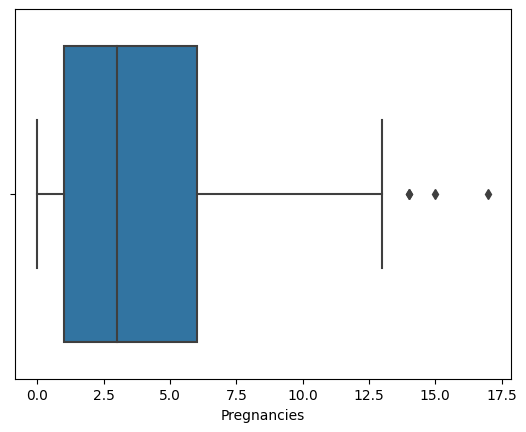

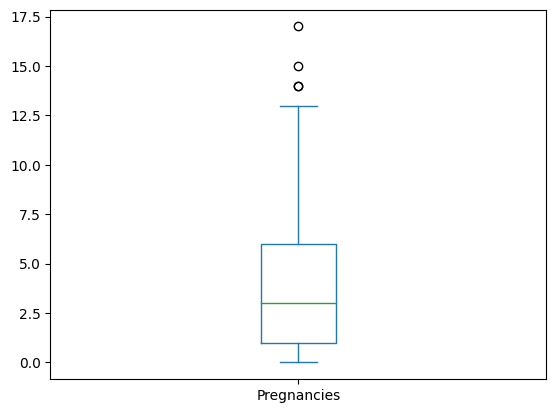

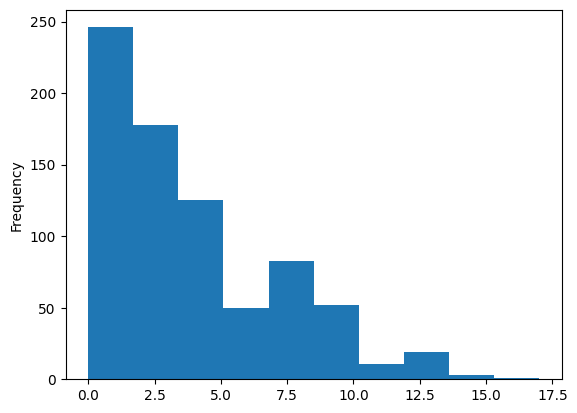

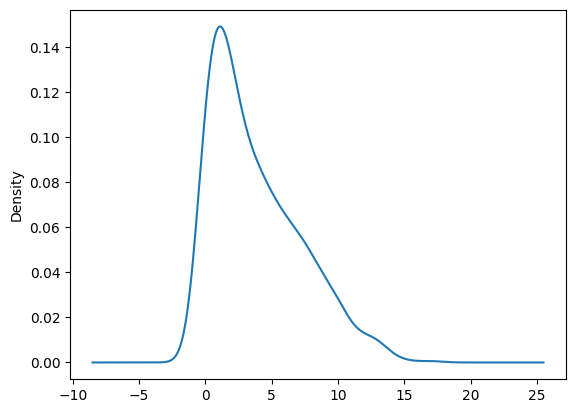

Glucose


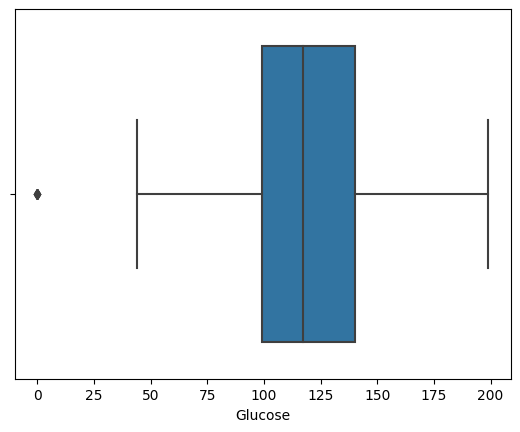

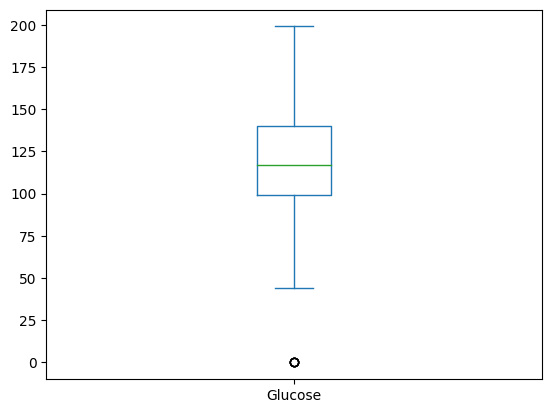

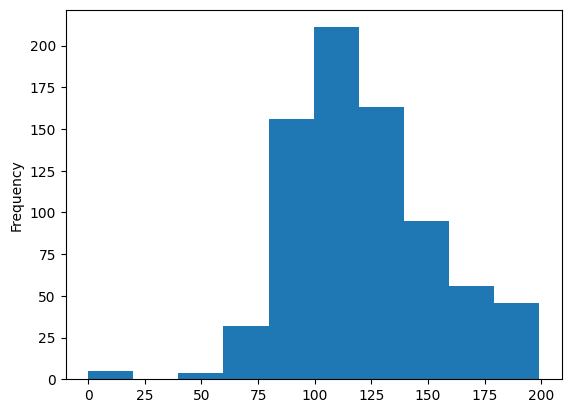

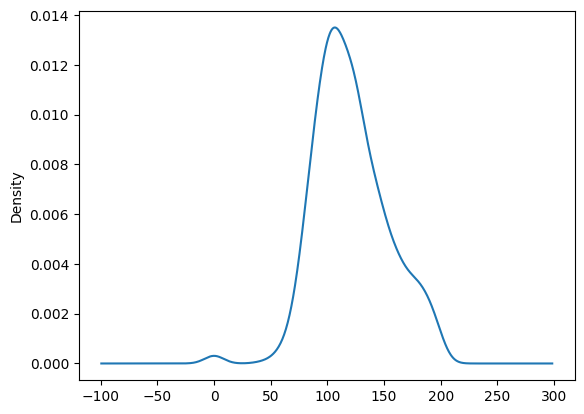

BloodPressure


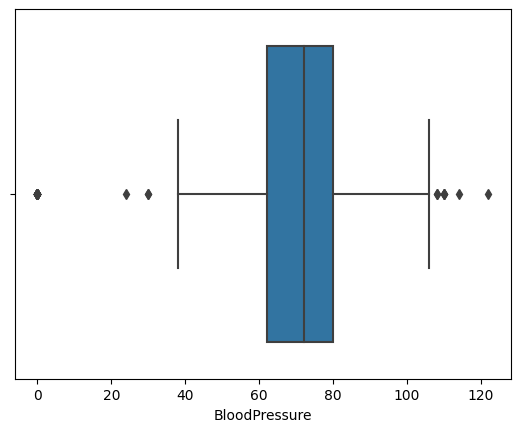

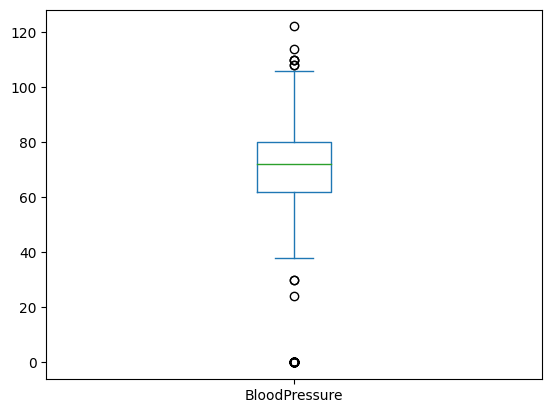

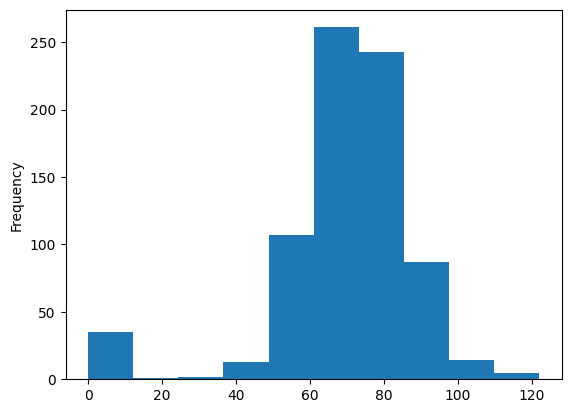

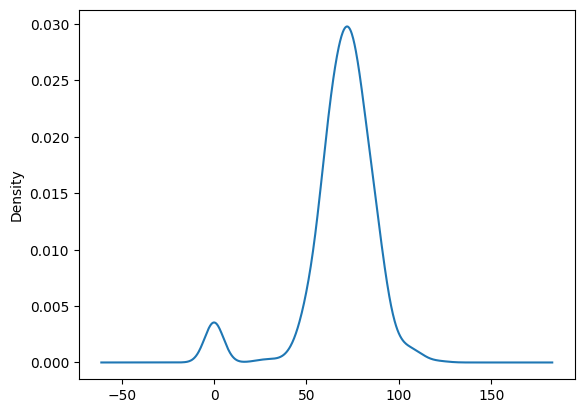

SkinThickness


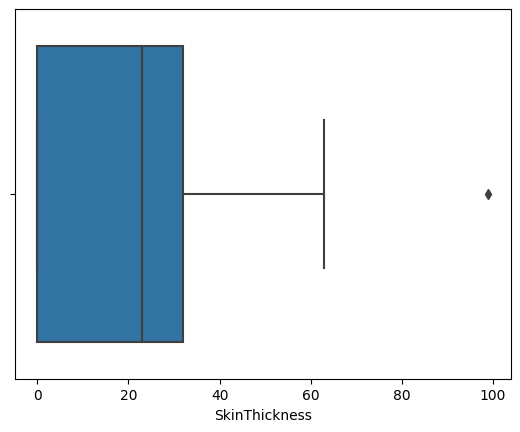

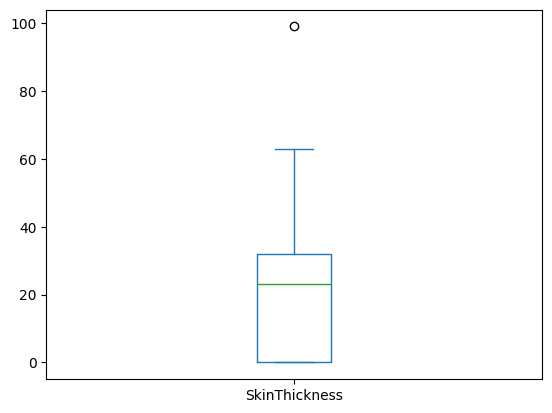

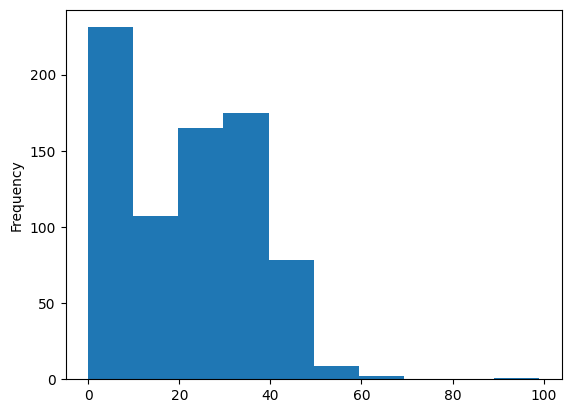

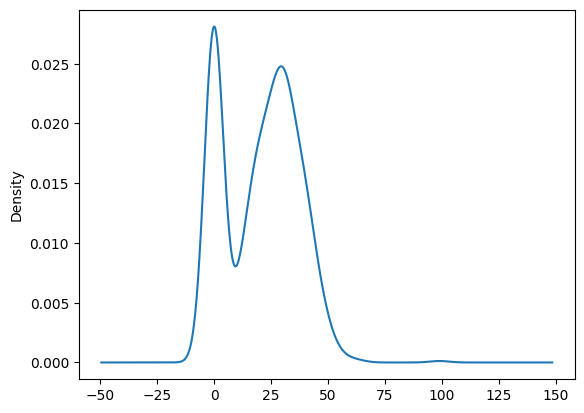

Insulin


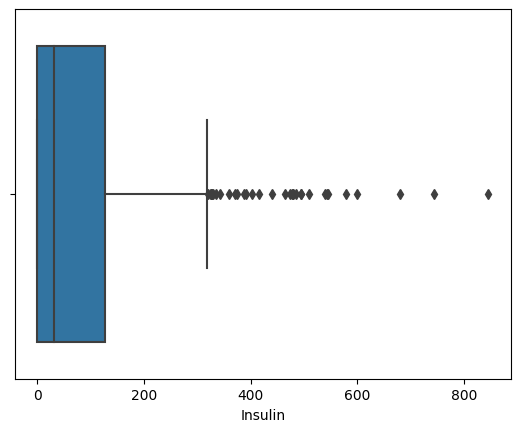

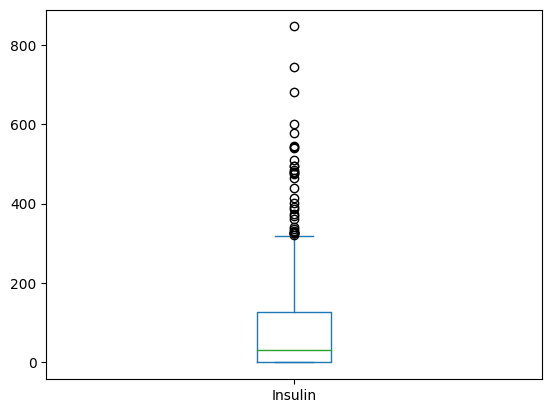

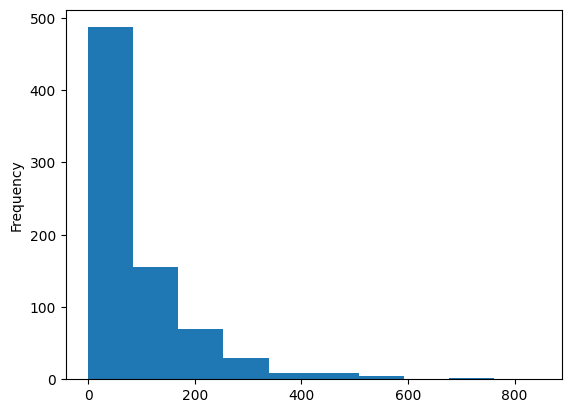

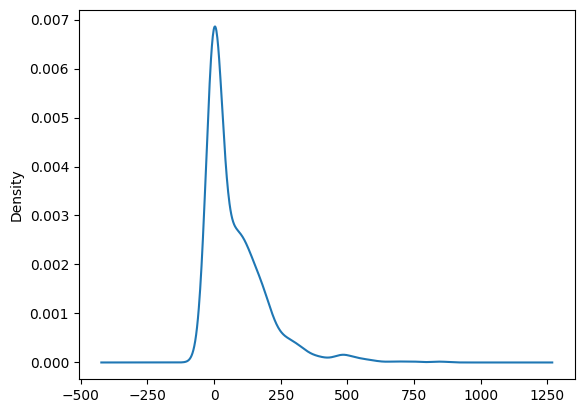

BMI


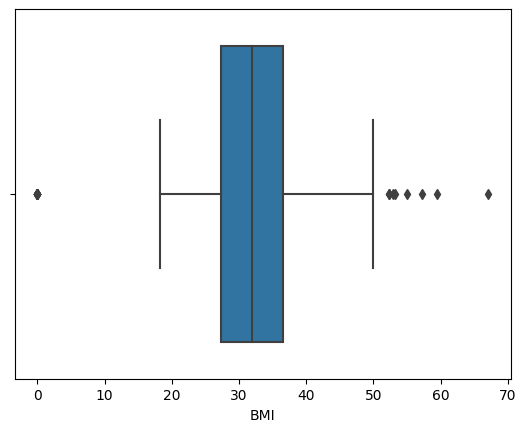

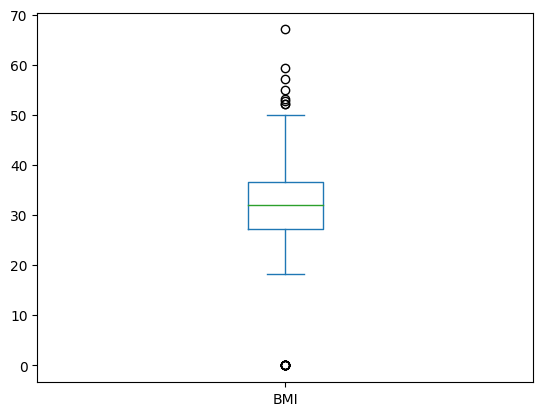

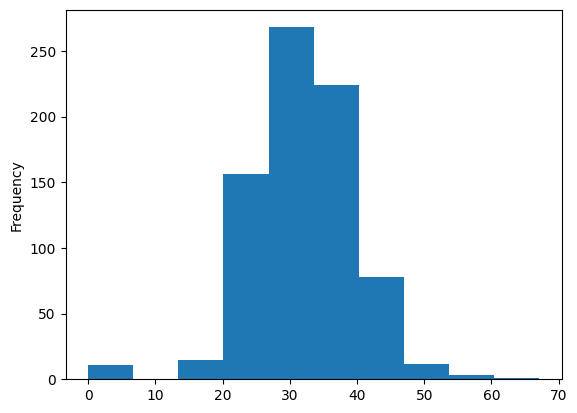

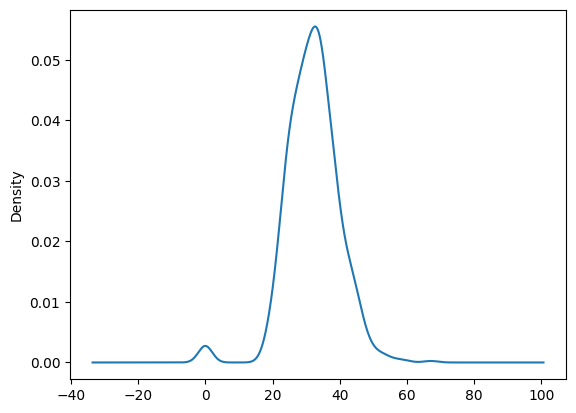

DiabetesPedigreeFunction


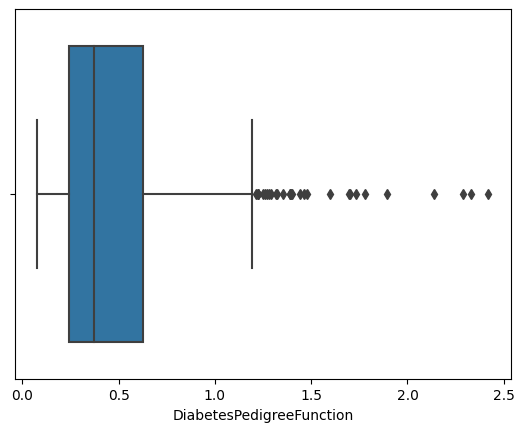

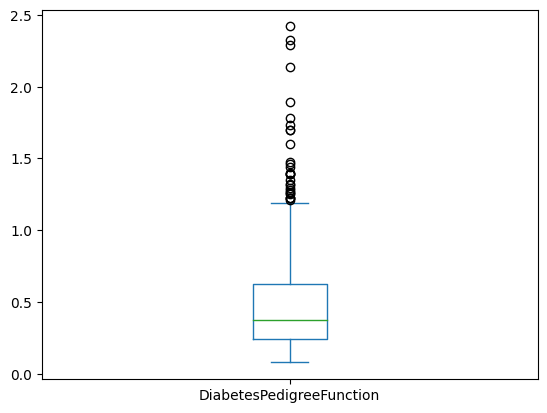

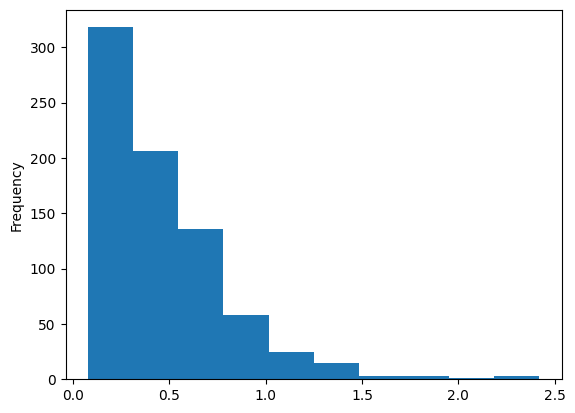

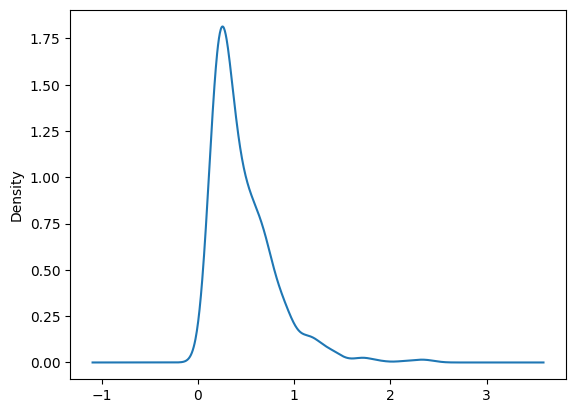

Age


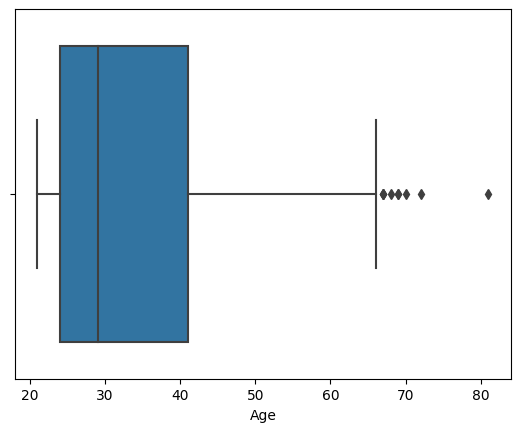

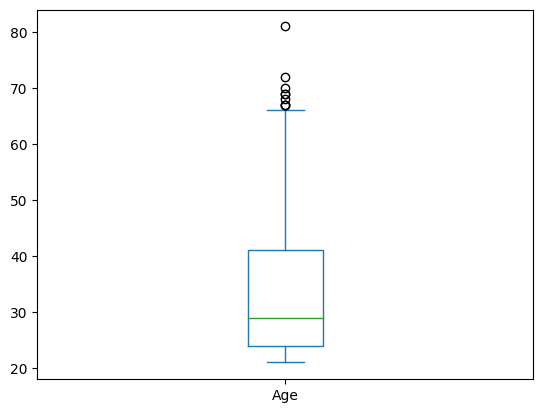

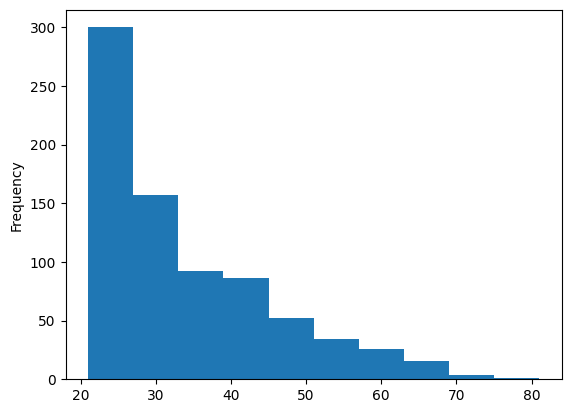

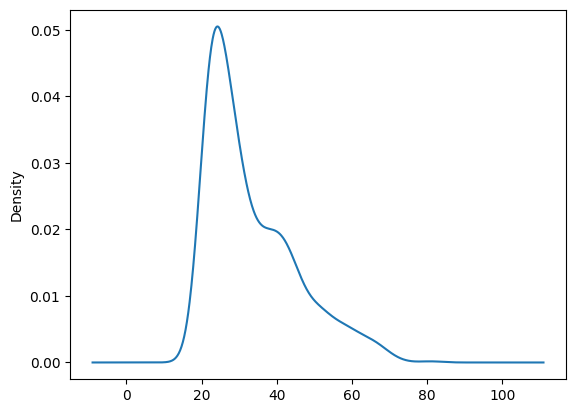

Outcome


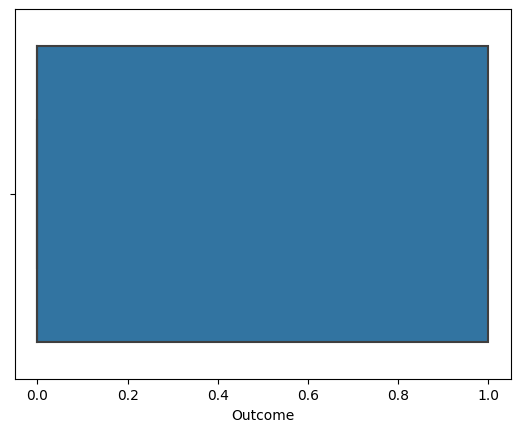

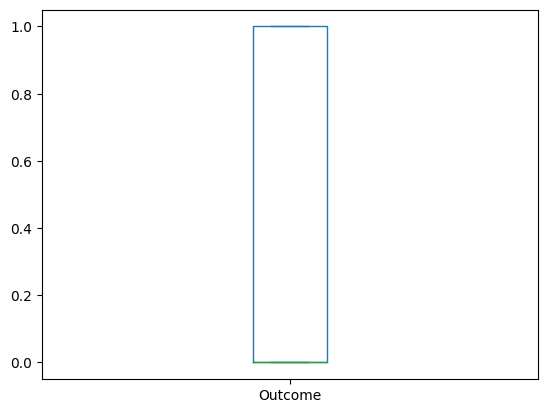

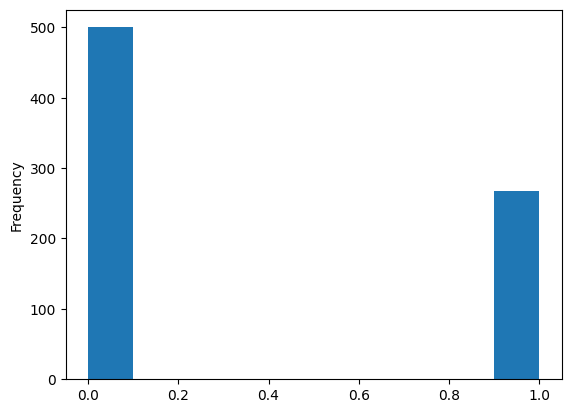

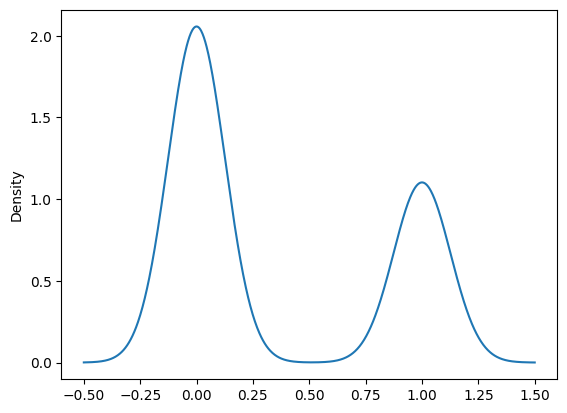

In [17]:
# visual univariate analysis
univariate(df)

In [29]:
# statistical way to  represent the outliers
df.skew()

Pregnancies                 0.901674
Glucose                     0.173754
BloodPressure              -1.843608
SkinThickness               0.109372
Insulin                     2.272251
BMI                        -0.428982
DiabetesPedigreeFunction    1.919911
Age                         1.129597
Outcome                     0.635017
dtype: float64

In [30]:
# kurtosis shows the tailness of the distribution
# numbers indicate the outlier
df.kurt()

Pregnancies                 0.159220
Glucose                     0.640780
BloodPressure               5.180157
SkinThickness              -0.520072
Insulin                     7.214260
BMI                         3.290443
DiabetesPedigreeFunction    5.594954
Age                         0.643159
Outcome                    -1.600930
dtype: float64

# bi variate analysis betwen to num features


In [61]:
def min_max(df):
  for i in df.columns:
    print(i,"min")
    print(df[i].min())

    print(i,"max")
    print(df[i].max())



In [62]:
# range of all features
min_max(df)

Pregnancies min
0
Pregnancies max
17
Glucose min
0
Glucose max
199
BloodPressure min
0
BloodPressure max
122
SkinThickness min
0
SkinThickness max
99
Insulin min
0
Insulin max
846
BMI min
0.0
BMI max
67.1
DiabetesPedigreeFunction min
0.078
DiabetesPedigreeFunction max
2.42
Age min
21
Age max
81
Outcome min
0
Outcome max
1


In [53]:
# bi variate analysis
clo2 = df["Outcome"]
for i in df.columns:
  def scatter(df,col1,col2):
    sns.scatterplot(x=df[col1],y=df[col2])
    plt.show()

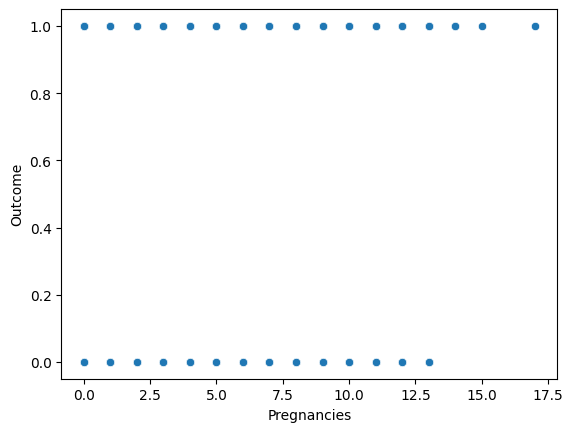

In [54]:
scatter(df,"Pregnancies","Outcome")

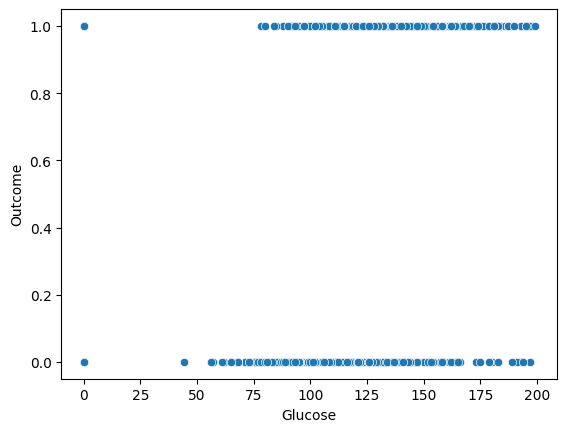

In [55]:
scatter(df,"Glucose","Outcome")

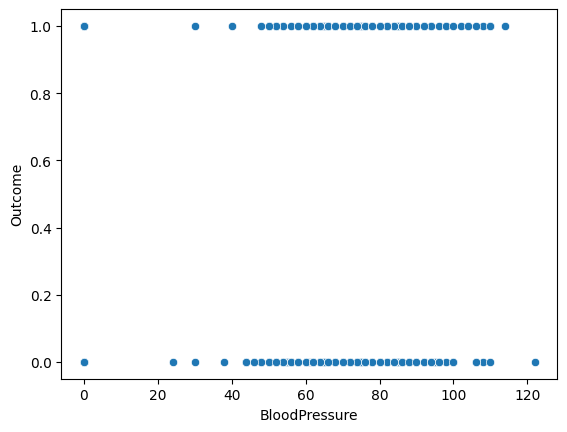

In [63]:
scatter(df,"BloodPressure","Outcome")

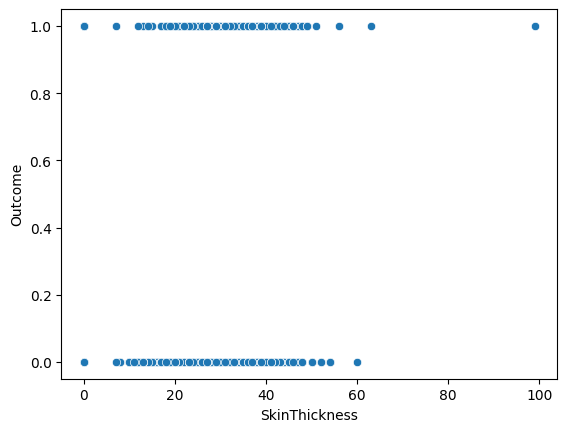

In [60]:
scatter(df,"SkinThickness","Outcome")

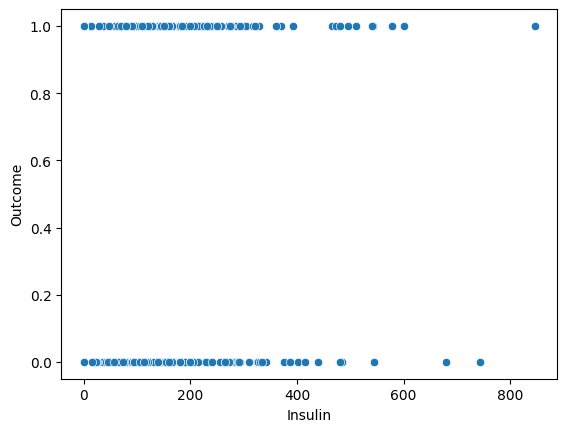

In [65]:
scatter(df,"Insulin","Outcome")

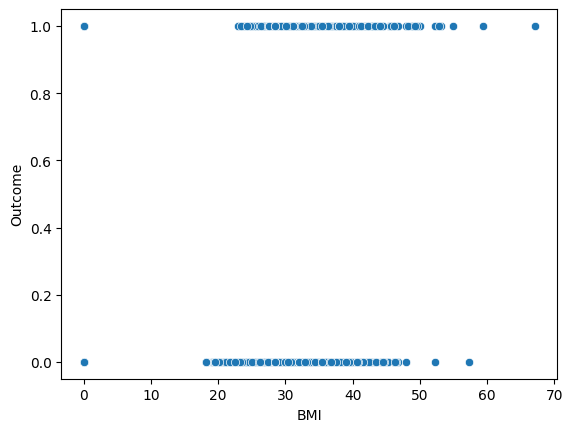

In [66]:
scatter(df,"BMI","Outcome")

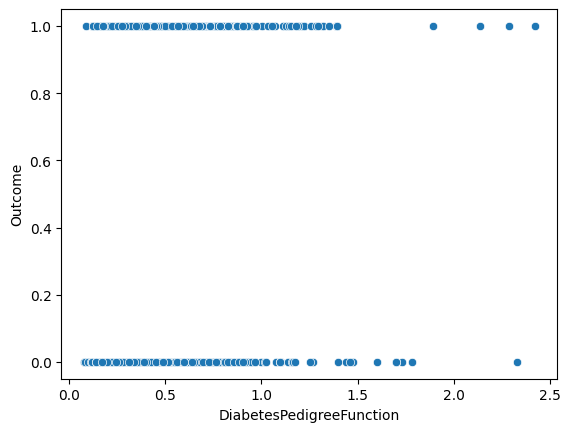

In [68]:
scatter(df,"DiabetesPedigreeFunction","Outcome")

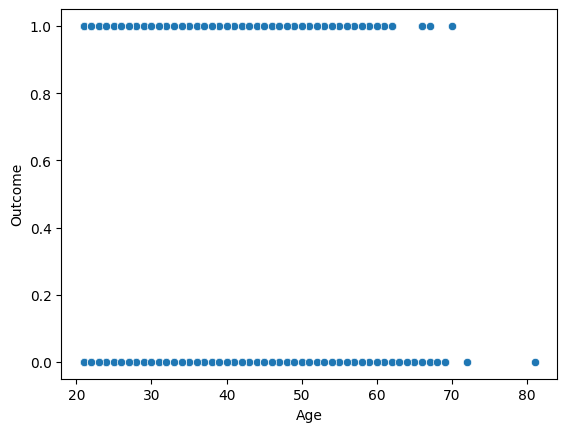

In [69]:
scatter(df,"Age","Outcome")

Text(0.5, 1.0, 'the predicted values indicates')

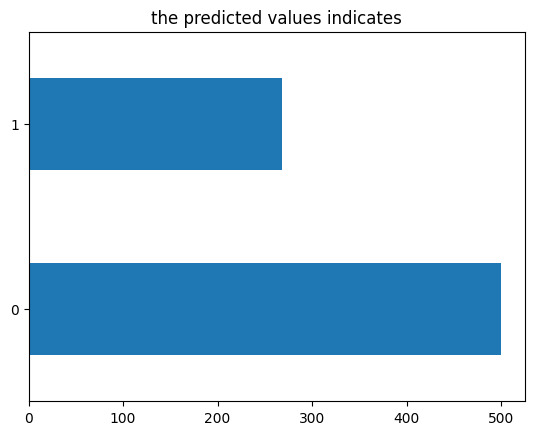

In [82]:
df["Outcome"].value_counts().plot(kind="barh")
plt.title("the predicted values indicates")

<Axes: xlabel='Outcome', ylabel='count'>

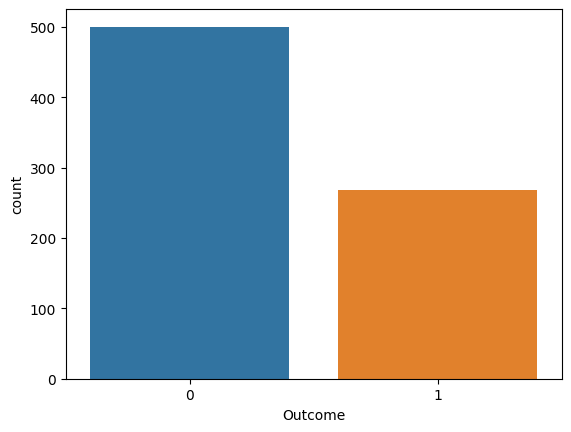

In [83]:
sns.countplot(x=df["Outcome"])

# observations:
 - In the 60%  are non diabetic people 500
 - There are 268 are diabetic holders are presented in data

<Axes: xlabel='Pregnancies', ylabel='BloodPressure'>

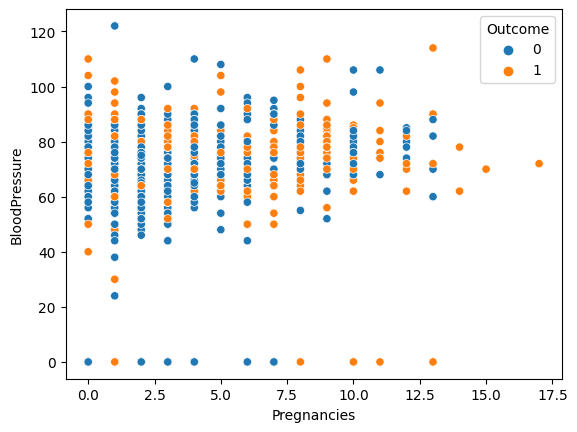

In [71]:
sns.scatterplot(x="Pregnancies",y="BloodPressure",hue="Outcome",data=df)


In [72]:
# non visual visual bi variate analysis
df.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


# observations :
- The age and Pregnancies  positive corelation with 0.54
- THe Glucose and  outcomes have positive corelation each other 0.46

# building model to predict the diabetes

In [75]:
# identify  input and output features
X = df.drop("Outcome",axis=1)
y = df["Outcome"]

In [77]:
X.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33


In [78]:
y.head()

0    1
1    0
2    1
3    0
4    1
Name: Outcome, dtype: int64

In [79]:
y.value_counts()

0    500
1    268
Name: Outcome, dtype: int64

In [85]:
# split the data
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size= 0.25,random_state =0)
print(X_train.shape,y_train.shape)
print(X_test.shape,y_test.shape)

(576, 8) (576,)
(192, 8) (192,)


In [86]:
# data preprocessing of train data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_rescaled = pd.DataFrame(scaler.fit_transform(X_train),
                                columns=X_train.columns,
                                index=X_train.index)
X_train_rescaled.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
762,1.507552,-1.015215,-0.404519,-1.319215,-0.718238,-1.220701,-0.983259,-0.048640
127,-0.829864,-0.099647,-0.615096,0.928730,0.083747,0.137191,-0.624936,-0.882466
564,-1.122041,-0.952072,0.543076,-1.319215,-0.718238,0.024033,0.398842,-0.548935
375,2.384083,0.594922,0.648364,1.365830,2.054583,0.879002,0.179030,2.035925
663,1.507552,0.752778,0.543076,1.553159,0.390891,0.715552,0.507242,0.535038


# logisticregression algorithm

In [87]:
# building model
from sklearn.linear_model import LogisticRegression
reg = LogisticRegression()
reg.fit(X_train_rescaled,y_train)

LogisticRegression()

In [88]:
# preprocesing of test data
X_test_rescaled = pd.DataFrame(scaler.transform(X_test),
                               columns=X_test.columns,
                               index=X_test.index)
X_test_rescaled.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
661,-0.829864,2.457628,0.332499,1.365830,-0.718238,1.344205,2.786654,-0.965849
122,-0.537687,-0.446931,0.227211,0.554072,0.134938,0.174910,-0.194347,-0.882466
113,0.046667,-1.425641,-0.404519,-1.319215,-0.718238,0.225202,-0.233492,-0.715701
14,0.338844,1.415775,0.121922,-0.132800,0.774820,-0.805790,0.356686,1.452247
529,-1.122041,-0.320646,-0.246587,-1.319215,-0.718238,-0.956667,0.576497,-0.215405


In [92]:
# prediction
y_test_predi_l =reg.predict(X_test_rescaled)
from sklearn import metrics
print("accauracy_scaore",metrics.accuracy_score(y_test,y_test_predi_l))
print("accauracy_scaore",metrics.classification_report(y_test,y_test_predi_l))


accauracy_scaore 0.8020833333333334
accauracy_scaore               precision    recall  f1-score   support

           0       0.84      0.88      0.86       130
           1       0.71      0.65      0.68        62

    accuracy                           0.80       192
   macro avg       0.78      0.76      0.77       192
weighted avg       0.80      0.80      0.80       192



# KNN algorithm

In [91]:
# building model
from sklearn.neighbors import KNeighborsClassifier
reg = KNeighborsClassifier()
reg.fit(X_train_rescaled,y_train)

# prediction
y_test_predi_k =reg.predict(X_test_rescaled)
from sklearn import metrics
print("accauracy_scaore",metrics.accuracy_score(y_test,y_test_predi_k))
print("accauracy_scaore",metrics.classification_report(y_test,y_test_predi_k))


accauracy_scaore 0.8020833333333334
accauracy_scaore               precision    recall  f1-score   support

           0       0.84      0.88      0.86       130
           1       0.71      0.65      0.68        62

    accuracy                           0.80       192
   macro avg       0.78      0.76      0.77       192
weighted avg       0.80      0.80      0.80       192



# decision tree algorithm


In [105]:
# building model
from sklearn.tree import DecisionTreeClassifier
reg = DecisionTreeClassifier(max_depth=3)
reg.fit(X_train_rescaled,y_train)

# prediction
y_test_predi_d =reg.predict(X_test_rescaled)
from sklearn import metrics
print("accauracy_scaore",metrics.accuracy_score(y_test,y_test_predi_d))
print("accauracy_scaore",metrics.classification_report(y_test,y_test_predi_d))


accauracy_scaore 0.734375
accauracy_scaore               precision    recall  f1-score   support

           0       0.75      0.92      0.82       130
           1       0.67      0.35      0.46        62

    accuracy                           0.73       192
   macro avg       0.71      0.64      0.64       192
weighted avg       0.72      0.73      0.71       192



# support vector  algorithm

In [97]:
# building model
from sklearn.svm import SVC
reg = SVC()
reg.fit(X_train_rescaled,y_train)

# prediction
y_test_predi_s =reg.predict(X_test_rescaled)
from sklearn import metrics
print("accauracy_scaore",metrics.accuracy_score(y_test,y_test_predi_s))
print("accauracy_scaore",metrics.classification_report(y_test,y_test_predi_s))


accauracy_scaore 0.7760416666666666
accauracy_scaore               precision    recall  f1-score   support

           0       0.80      0.90      0.84       130
           1       0.71      0.52      0.60        62

    accuracy                           0.78       192
   macro avg       0.75      0.71      0.72       192
weighted avg       0.77      0.78      0.77       192



# naive bayes algorithm

In [98]:
# building model
from sklearn.naive_bayes import GaussianNB
reg = GaussianNB()
reg.fit(X_train_rescaled,y_train)

# prediction
y_test_predi_nb =reg.predict(X_test_rescaled)
from sklearn import metrics
print("accauracy_scaore",metrics.accuracy_score(y_test,y_test_predi_nb))
print("accauracy_scaore",metrics.classification_report(y_test,y_test_predi_nb))


accauracy_scaore 0.765625
accauracy_scaore               precision    recall  f1-score   support

           0       0.80      0.88      0.84       130
           1       0.67      0.53      0.59        62

    accuracy                           0.77       192
   macro avg       0.74      0.70      0.71       192
weighted avg       0.76      0.77      0.76       192



# ensemble algorithms
## random forest algorithm

In [99]:
# building model
from sklearn.ensemble import RandomForestClassifier
reg = RandomForestClassifier()
reg.fit(X_train_rescaled,y_train)

# prediction
y_test_predi_r =reg.predict(X_test_rescaled)
from sklearn import metrics
print("accauracy_scaore",metrics.accuracy_score(y_test,y_test_predi_r))
print("accauracy_scaore",metrics.classification_report(y_test,y_test_predi_r))


accauracy_scaore 0.7864583333333334
accauracy_scaore               precision    recall  f1-score   support

           0       0.82      0.88      0.85       130
           1       0.70      0.60      0.64        62

    accuracy                           0.79       192
   macro avg       0.76      0.74      0.75       192
weighted avg       0.78      0.79      0.78       192



# adaboost algorithm

In [100]:
# building model
from sklearn.ensemble import AdaBoostClassifier
reg = AdaBoostClassifier()
reg.fit(X_train_rescaled,y_train)

# prediction
y_test_predi_a =reg.predict(X_test_rescaled)
from sklearn import metrics
print("accauracy_scaore",metrics.accuracy_score(y_test,y_test_predi_a))
print("accauracy_scaore",metrics.classification_report(y_test,y_test_predi_a))


accauracy_scaore 0.7916666666666666
accauracy_scaore               precision    recall  f1-score   support

           0       0.84      0.86      0.85       130
           1       0.69      0.65      0.67        62

    accuracy                           0.79       192
   macro avg       0.76      0.75      0.76       192
weighted avg       0.79      0.79      0.79       192



# gbdt algorithm

In [101]:
# building model
from sklearn.ensemble import GradientBoostingClassifier
reg = GradientBoostingClassifier()
reg.fit(X_train_rescaled,y_train)

# prediction
y_test_predi_g =reg.predict(X_test_rescaled)
from sklearn import metrics
print("accauracy_scaore",metrics.accuracy_score(y_test,y_test_predi_g))
print("accauracy_scaore",metrics.classification_report(y_test,y_test_predi_g))


accauracy_scaore 0.8072916666666666
accauracy_scaore               precision    recall  f1-score   support

           0       0.83      0.90      0.86       130
           1       0.75      0.61      0.67        62

    accuracy                           0.81       192
   macro avg       0.79      0.76      0.77       192
weighted avg       0.80      0.81      0.80       192



# Xgboost algorithm

In [102]:
# building model
from sklearn.ensemble import ExtraTreesClassifier
reg = ExtraTreesClassifier()
reg.fit(X_train_rescaled,y_train)

# prediction
y_test_predi_g =reg.predict(X_test_rescaled)
from sklearn import metrics
print("accauracy_scaore",metrics.accuracy_score(y_test,y_test_predi_g))
print("accauracy_scaore",metrics.classification_report(y_test,y_test_predi_g))


accauracy_scaore 0.8125
accauracy_scaore               precision    recall  f1-score   support

           0       0.85      0.88      0.86       130
           1       0.73      0.66      0.69        62

    accuracy                           0.81       192
   macro avg       0.79      0.77      0.78       192
weighted avg       0.81      0.81      0.81       192



# feature importance

In [108]:
reg.feature_importances_

array([0.        , 0.58371905, 0.        , 0.        , 0.        ,
       0.1612313 , 0.05737005, 0.1976796 ])

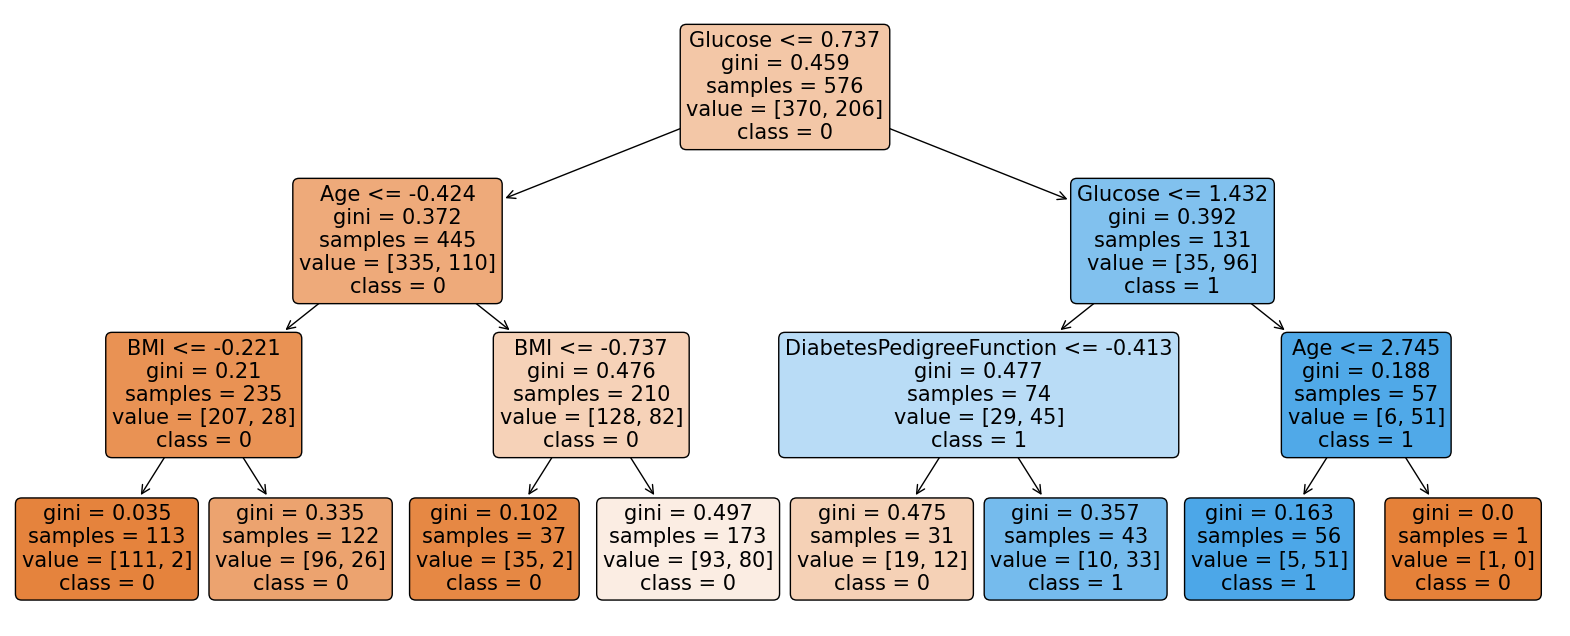

In [113]:
from sklearn.tree import plot_tree
plt.figure(figsize=(20,8))
s =plot_tree(reg,feature_names=X_train_rescaled.columns,
             class_names =["0","1"],
             filled = True,
             rounded = True,
             fontsize = 15)

<Axes: >

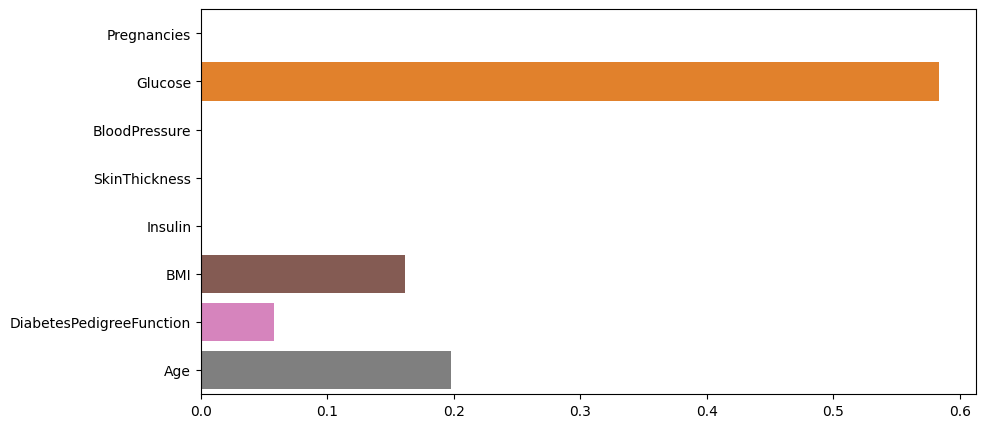

In [118]:
plt.figure(figsize=(10,5))
sns.barplot(x = reg.feature_importances_,y=X_train_rescaled.columns)

# observations :
- The above  plot show the most important feature of given the data
- The Glucose most important feature a to compare with others feature
- Age and Bmi are also important features to predict the diabetes